In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('student_data.csv')
df.head()

,student_id,marks,attendance,logins
0,1,85,92,50
1,2,78,88,45
2,3,55,65,20
3,4,90,95,60
4,5,70,75,35


In [5]:
print("Average Marks:", df['marks'].mean())
print("Average Attendance:", df['attendance'].mean())
print("Average Logins:", df['logins'].mean())

print("\nCorrelation Matrix:\n", df[['marks', 'attendance', 'logins']].corr())

Average Marks: 71.1
Average Attendance: 79.1
Average Logins: 38.8

Correlation Matrix:
                marks  attendance    logins
marks       1.000000    0.993664  0.985438
attendance  0.993664    1.000000  0.984933
logins      0.985438    0.984933  1.000000


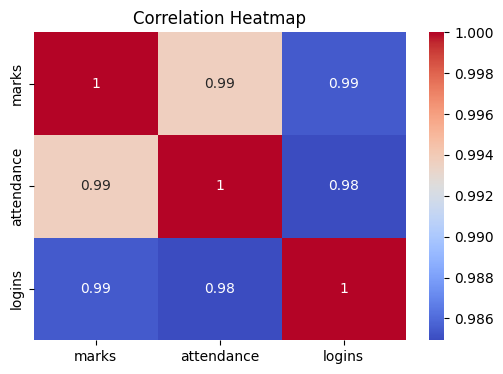

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['marks', 'attendance', 'logins']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8844\4006221834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='marks', data=sorted_df, palette='viridis')


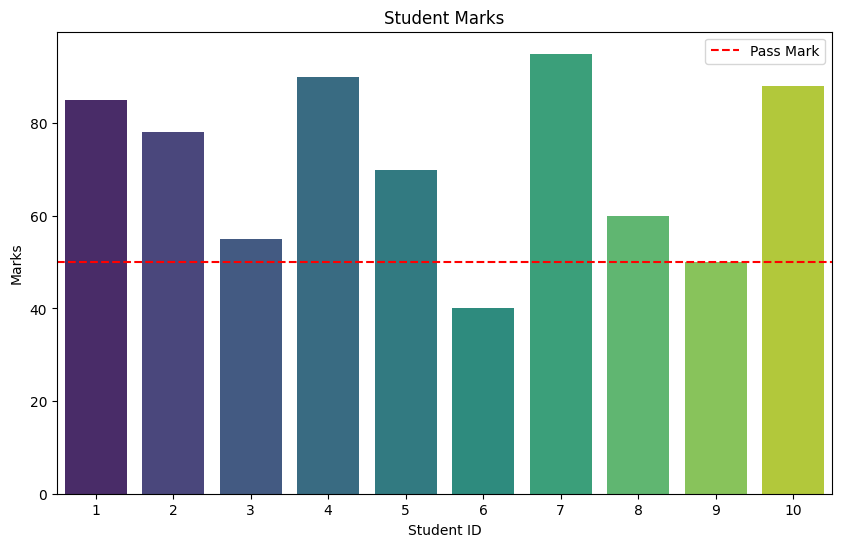

In [7]:
# Sort by marks
sorted_df = df.sort_values('marks', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='student_id', y='marks', data=sorted_df, palette='viridis')
plt.axhline(y=50, color='red', linestyle='--', label='Pass Mark')
plt.title('Student Marks')
plt.xlabel('Student ID')
plt.ylabel('Marks')
plt.legend()
plt.show()

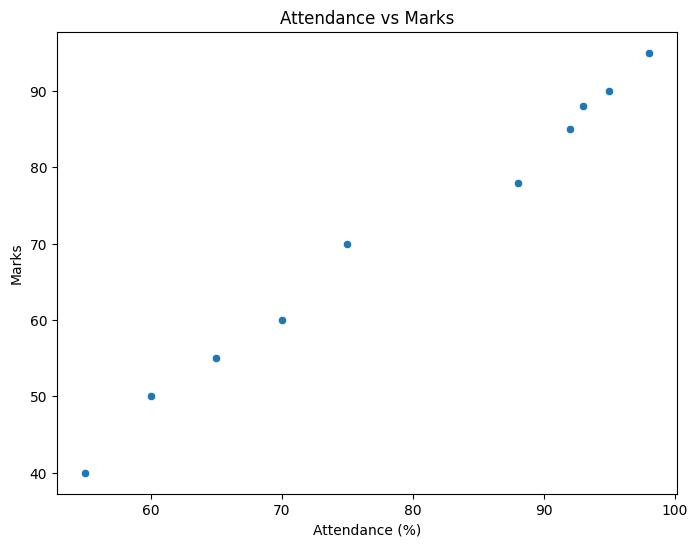

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='attendance', y='marks', data=df)
plt.title('Attendance vs Marks')
plt.xlabel('Attendance (%)')
plt.ylabel('Marks')
plt.show()

In [9]:
# Example: students with marks < 50 or attendance < 60
at_risk = df[(df['marks'] < 50) | (df['attendance'] < 60)]
print("At-Risk Students:")
print(at_risk)

At-Risk Students:
   student_id  marks  attendance  logins
5           6     40          55      15


In [10]:
# Show all data sorted by marks
df.sort_values(by='marks')

,student_id,marks,attendance,logins
5,6,40,55,15
8,9,50,60,18
2,3,55,65,20
7,8,60,70,25
4,5,70,75,35
1,2,78,88,45
0,1,85,92,50
9,10,88,93,55
3,4,90,95,60
6,7,95,98,65


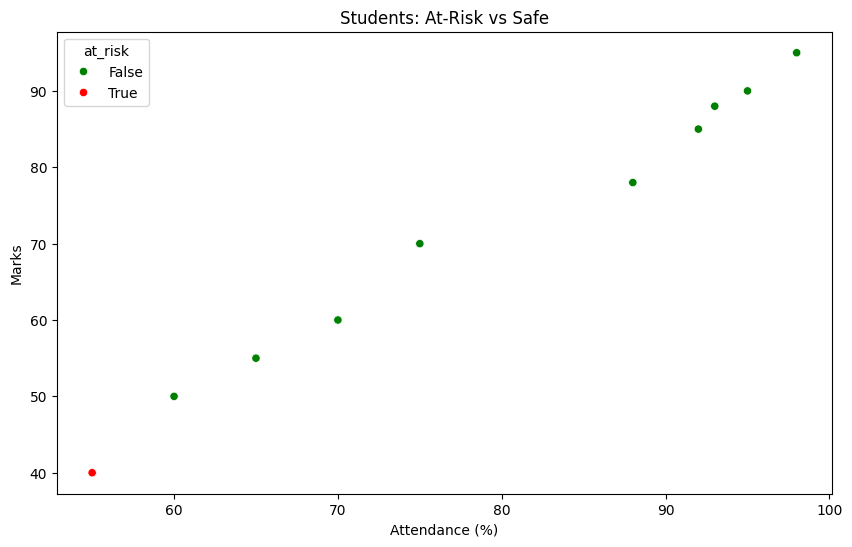

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a risk flag
df['at_risk'] = ((df['marks'] < 50) | (df['attendance'] < 60))

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='attendance', y='marks', hue='at_risk', palette={True: 'red', False: 'green'})
plt.title('Students: At-Risk vs Safe')
plt.xlabel('Attendance (%)')
plt.ylabel('Marks')
plt.show()


In [12]:
at_risk.to_csv('at_risk_students.csv', index=False)
print("At-risk students saved to 'at_risk_students.csv'")

At-risk students saved to 'at_risk_students.csv'


In [13]:
# Example: stricter rule
at_risk = df[(df['marks'] < 50) & (df['attendance'] < 70)]
print(at_risk)

   student_id  marks  attendance  logins  at_risk
5           6     40          55      15     True
